# Exploration du fichier source 'kc_house_data.csv' et régression linéaire

## Étape 1 : Préparation et Importation des Données

In [17]:
# 1. Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# 2. Charger la base de données

df = pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/quests/kc_house_data.csv")

In [3]:
# 3. Aperçu initial des données :

display(df.head())  # Affiche les 5 premières lignes
display(df.info())  # Donne des informations sur les types de colonnes et les valeurs manquantes
display(df.describe())  # Statistiques descriptives basiques (numériques uniquement)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

None

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.160900e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401174e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671546e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Étape 2 : Inspection des Données

In [13]:
# 1. Vérification des dimensions :

display(df.shape)  # Nombre de lignes et de colonnes

# 2. Recherche des valeurs manquantes :

display(df.isna().sum())  # Total des valeurs manquantes par colonne

(21613, 21)

,0
id,0
date,21613
price,4
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


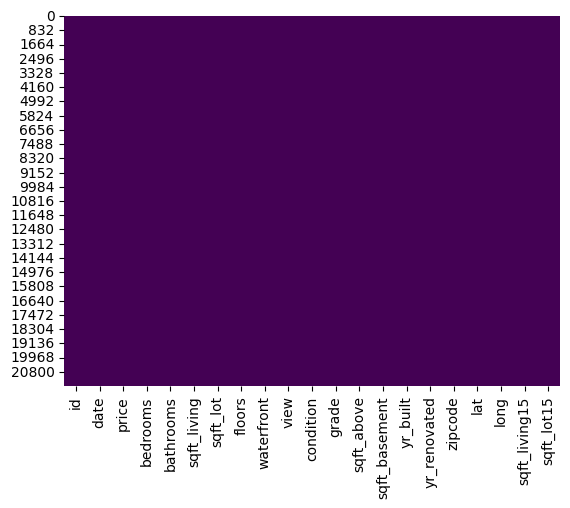

In [4]:
# Visualisation :

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

In [5]:
# 3. Identification des doublons :

print(df.duplicated().sum())  # Nombre de lignes dupliquées

0


In [14]:
# 4. Analyse des types de données :

display(df.dtypes)  # Vérification des types de colonnes

,0
id,object
date,datetime64[ns]
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,boolean
view,category


In [4]:
# 5. Reformatage des colonnes au type (format) incorrect :

# Colonne(s) contenant des dates au mauvais format texte (object ou string) :

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')


# Colonne(s) catégorique mal classée comme object :

df[['view','condition','grade']] = df[['view','condition','grade']].astype('category')


# Colonne(s) de booléen mal classés comme integer :

df['waterfront'] = df['waterfront'].astype('boolean')


# Colonne(s) d'identifiants mal classés comme numériques
# (exemple : codes postaux ou identifiants clients) :

df['id'] = df['id'].astype(str)
df['zipcode'] = df['zipcode'].astype(str)


## Étape 3 : Analyse des Variables

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64


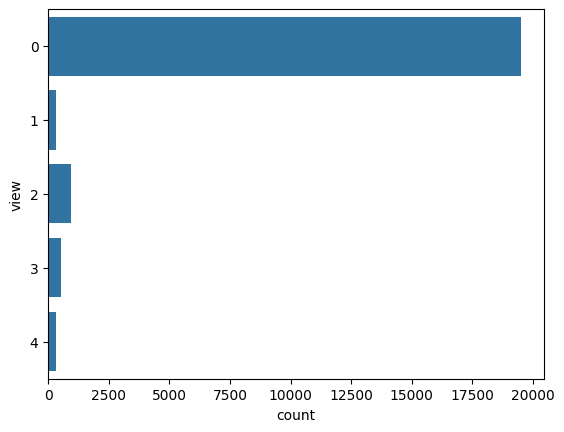

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64


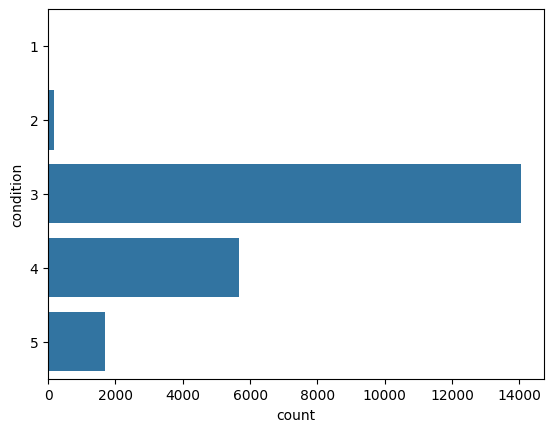

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64


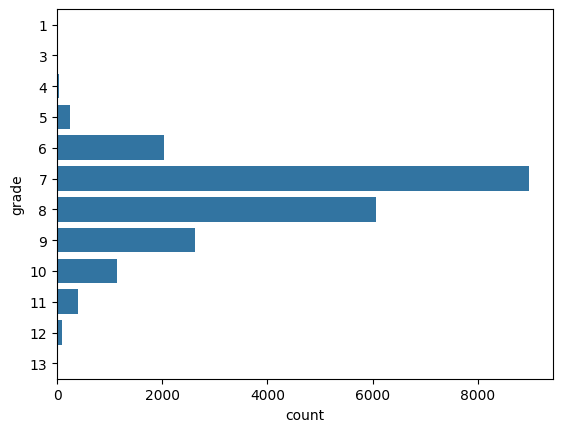

In [7]:
# 1. Variables catégoriques :

# Distribution des catégories :

for col in df.select_dtypes(include=['category']):
    print(df[col].value_counts())
    sns.countplot(y=col, data=df)
    plt.show()

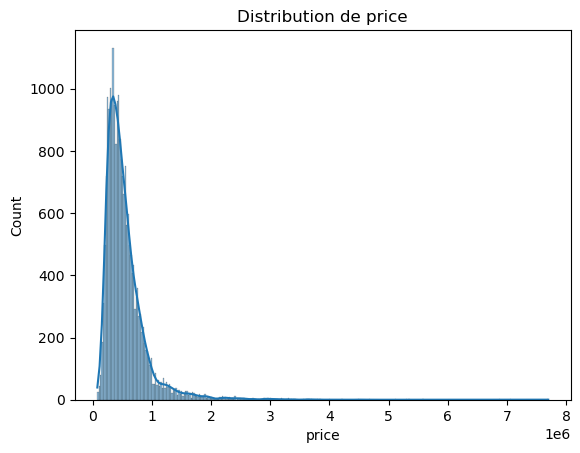

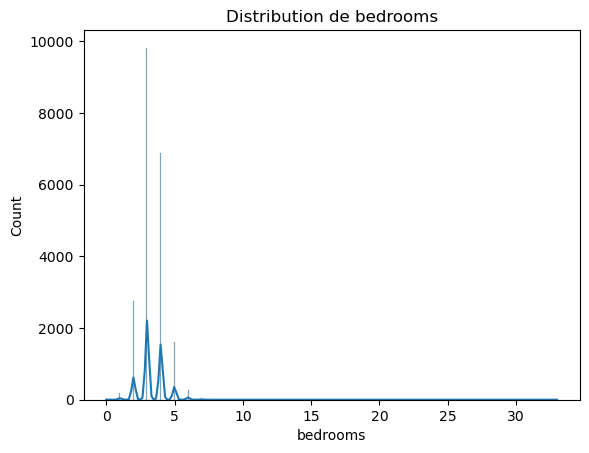

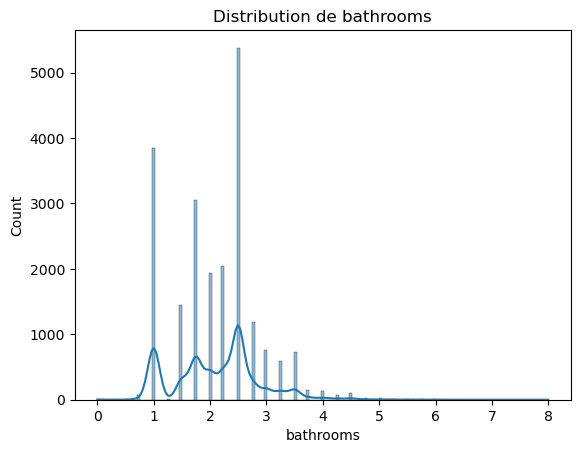

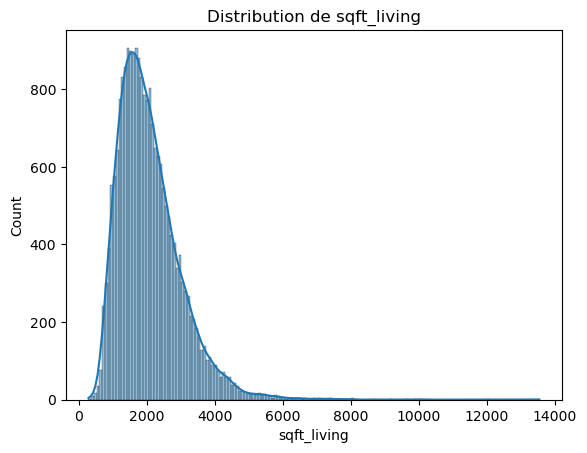

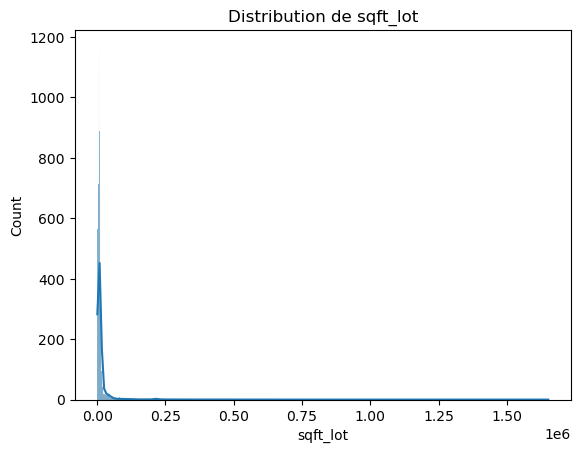

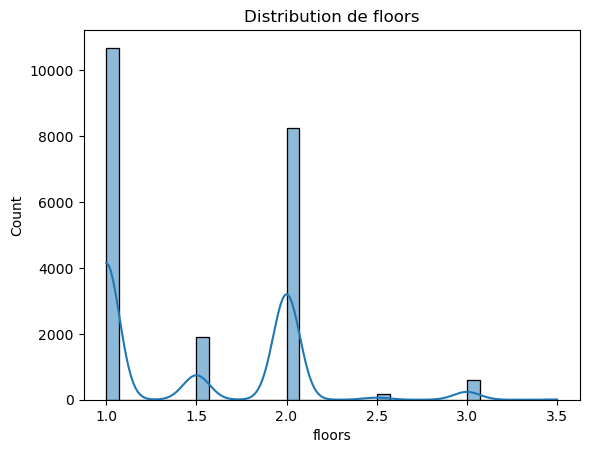

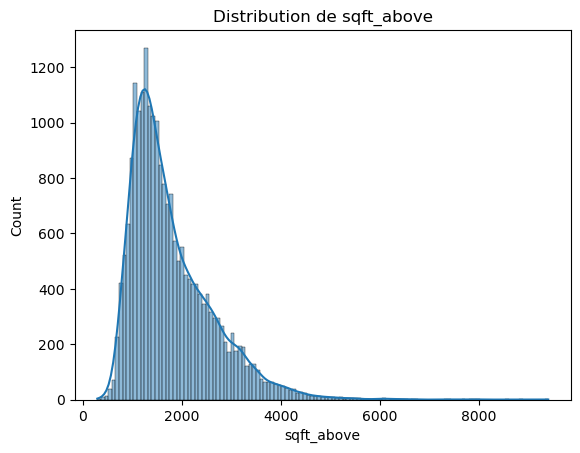

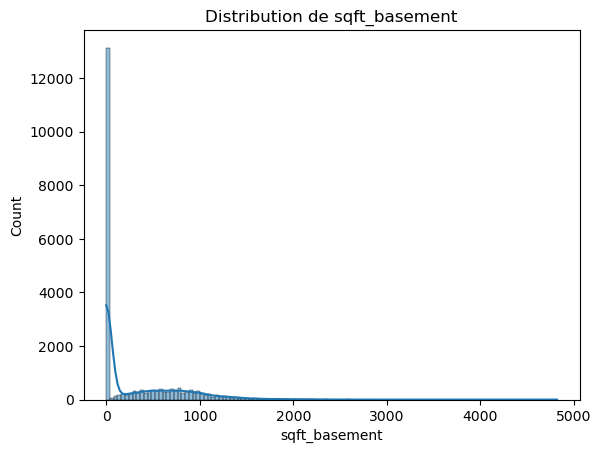

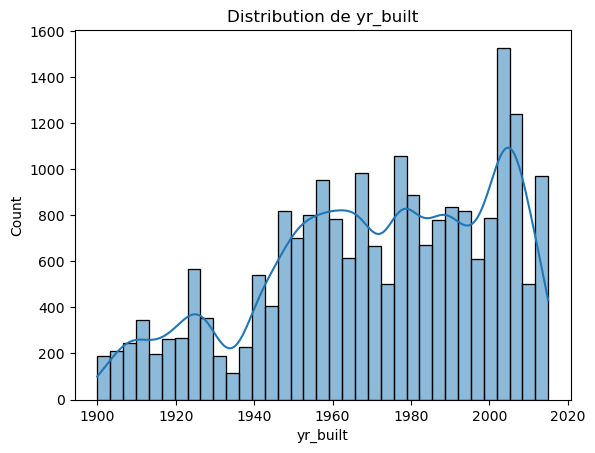

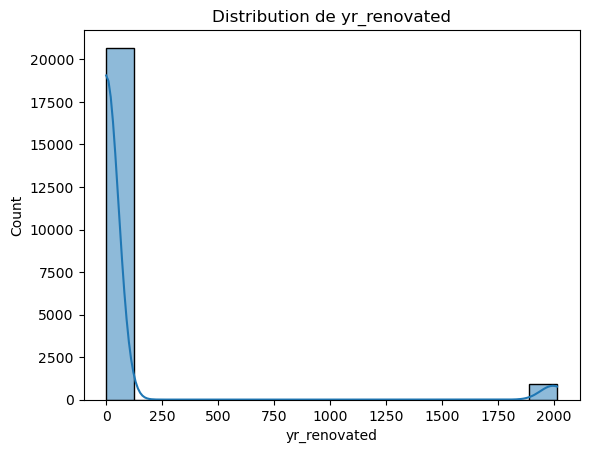

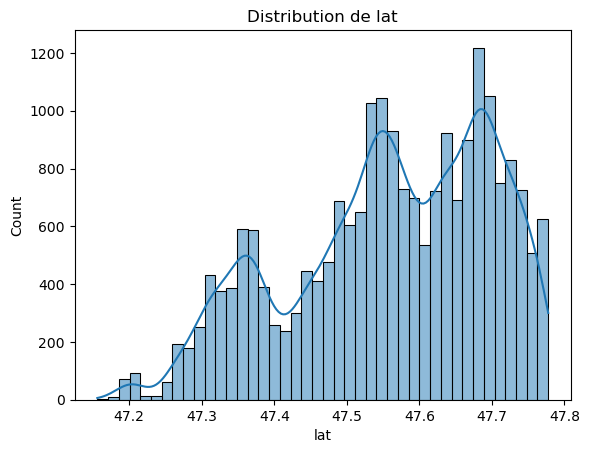

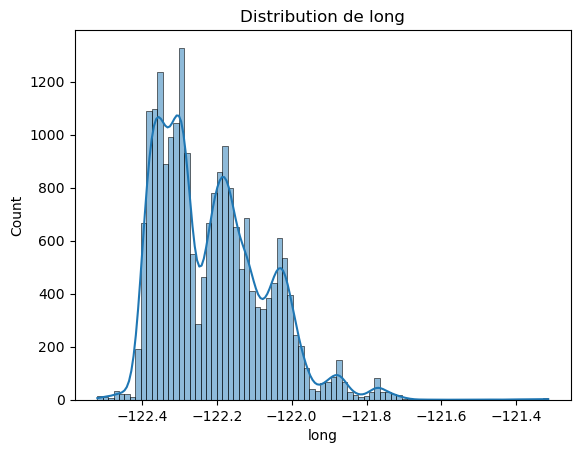

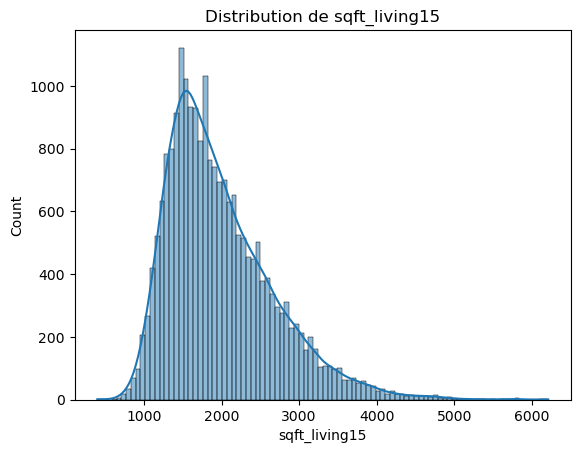

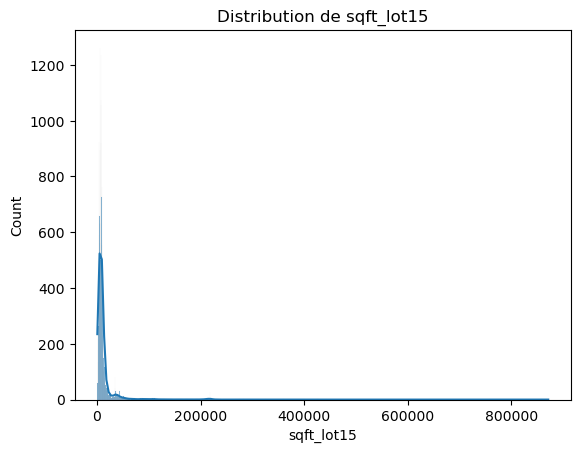

In [ ]:
# 2. Variables numériques :

# Statistiques de base et distribution :

for col in df.select_dtypes(include=['int64', 'float64']):
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()


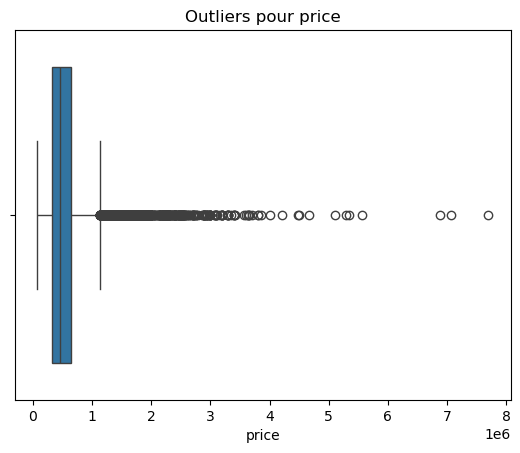

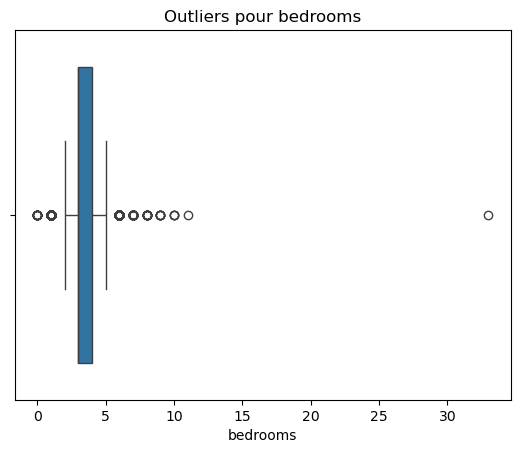

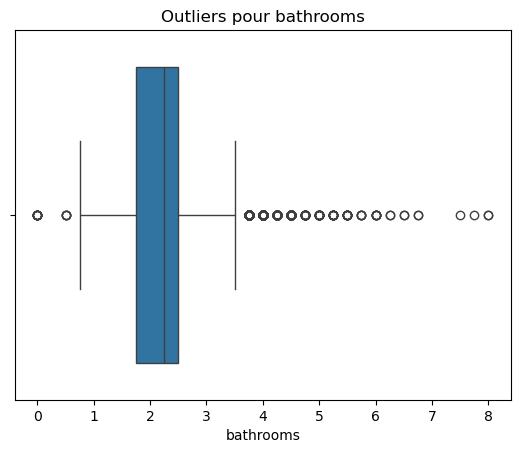

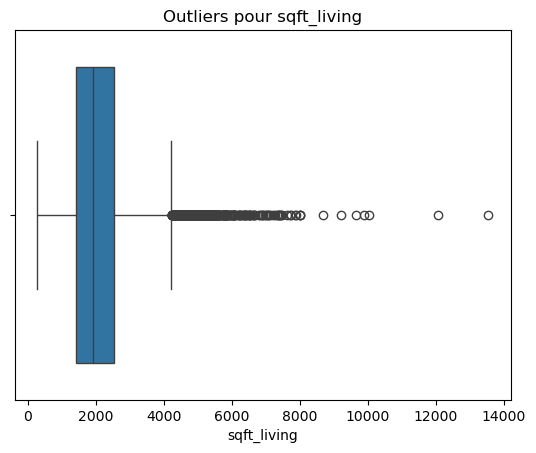

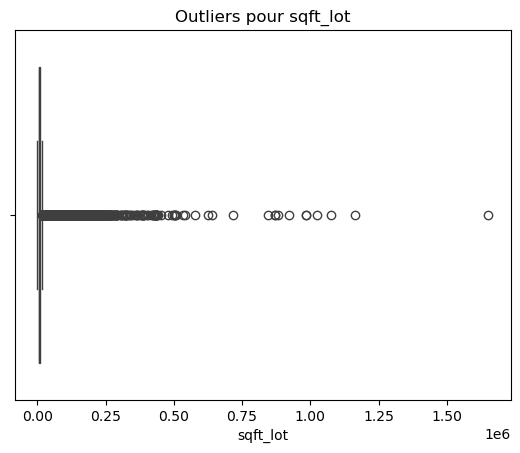

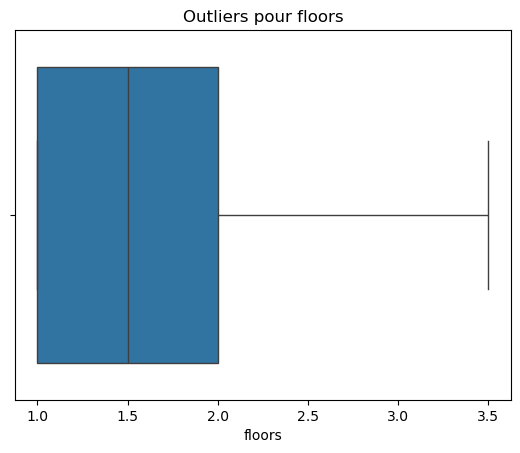

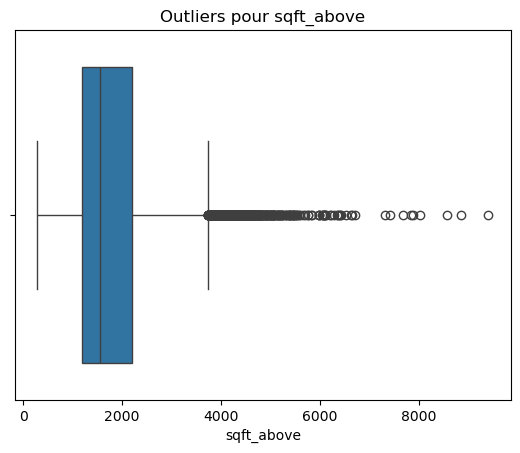

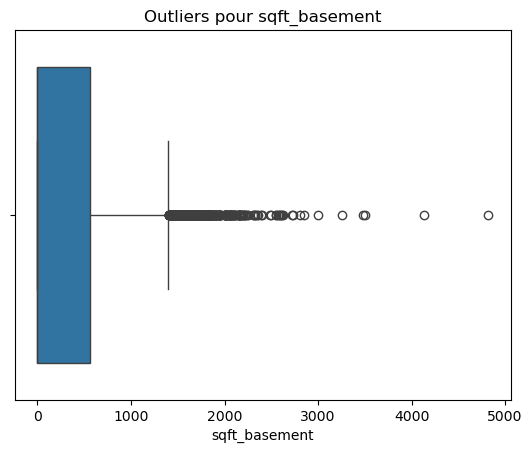

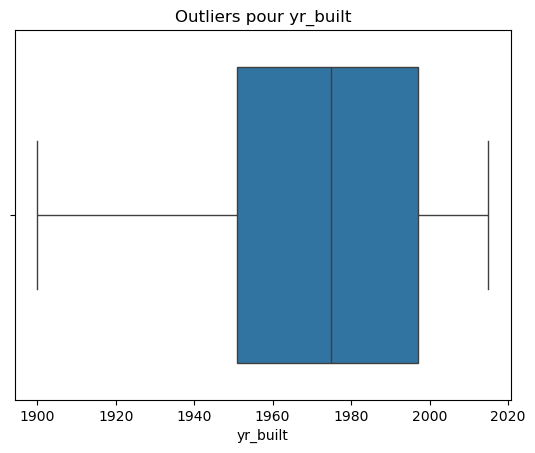

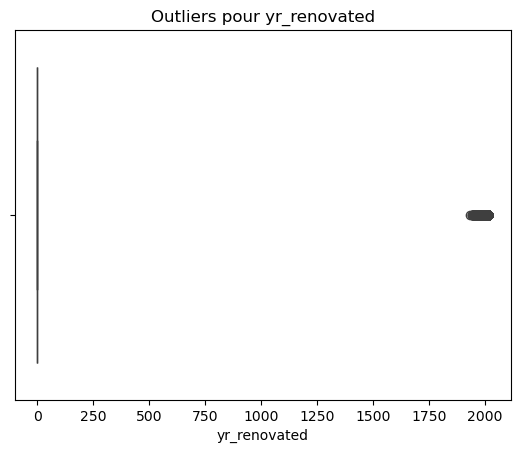

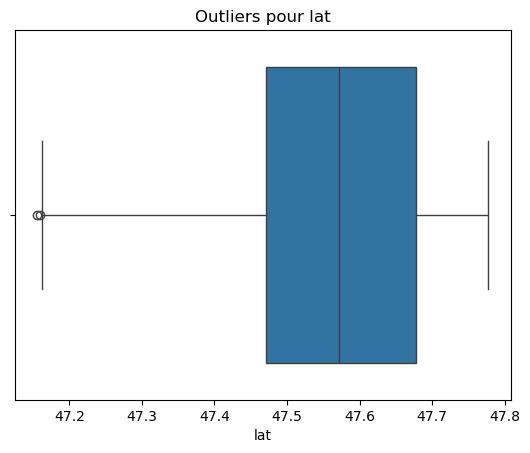

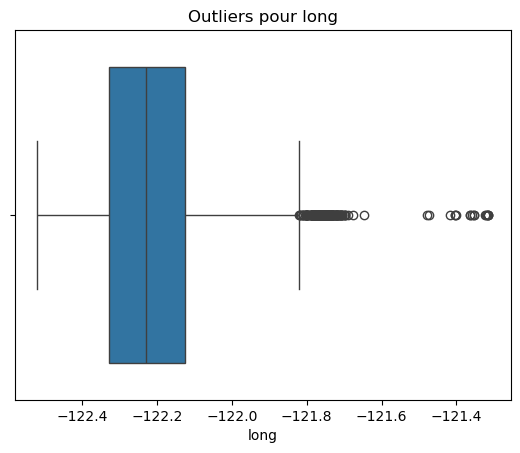

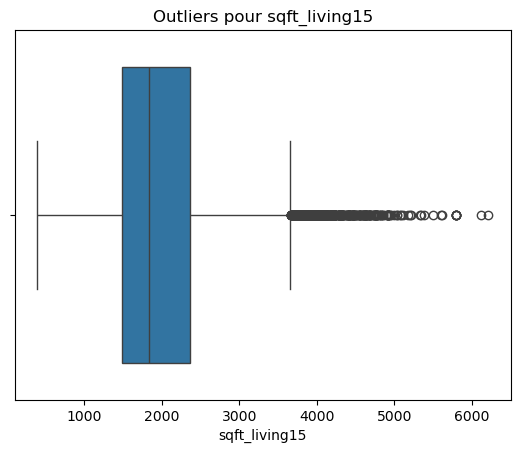

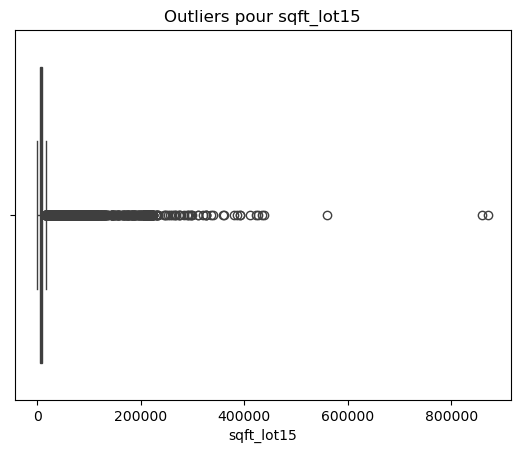

In [ ]:
# Boxplots pour détecter les outliers :

for col in df.select_dtypes(include=['int64', 'float64']):
    sns.boxplot(x=df[col])
    plt.title(f"Outliers pour {col}")
    plt.show()


# Étape 4 : Analyse des Relations

                     id  date     price  bedrooms  bathrooms  sqft_living  \
id             1.000000   NaN -0.016816  0.002461   0.005144    -0.012276   
date                NaN   NaN       NaN       NaN        NaN          NaN   
price         -0.016816   NaN  1.000000  0.315426   0.525178     0.702052   
bedrooms       0.002461   NaN  0.315426  1.000000   0.529159     0.591467   
bathrooms      0.005144   NaN  0.525178  0.529159   1.000000     0.754663   
sqft_living   -0.012276   NaN  0.702052  0.591467   0.754663     1.000000   
sqft_lot      -0.132118   NaN  0.089642  0.032807   0.087735     0.172822   
floors         0.018494   NaN  0.256911  0.181085   0.500645     0.353937   
waterfront    -0.002724   NaN  0.266369 -0.006611   0.063742     0.103816   
view           0.011582   NaN  0.397285  0.081930   0.187732     0.284606   
condition     -0.023701   NaN  0.036288  0.025478  -0.124946    -0.058704   
grade          0.008111   NaN  0.667457  0.366502   0.664979     0.762701   

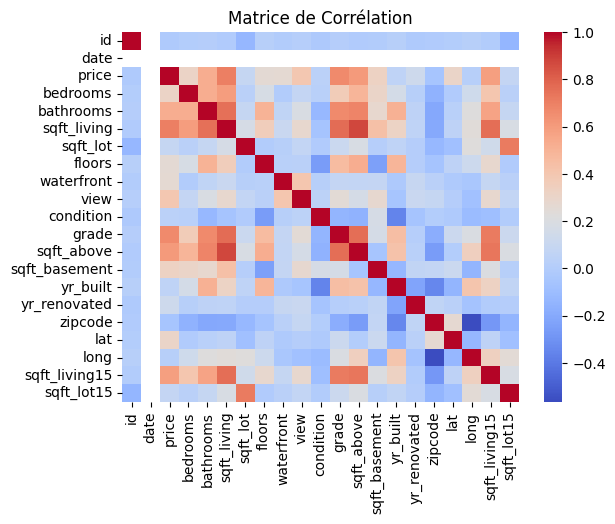

In [21]:
# 1. Corrélation entre variables numériques :
# Matrice de corrélation :

correlation_matrix = df.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title("Matrice de Corrélation")
plt.show()


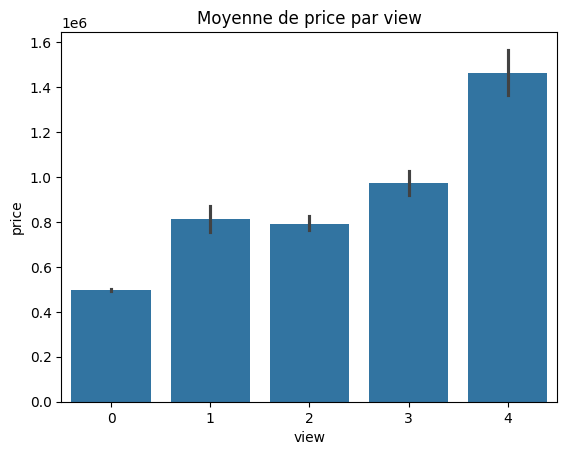

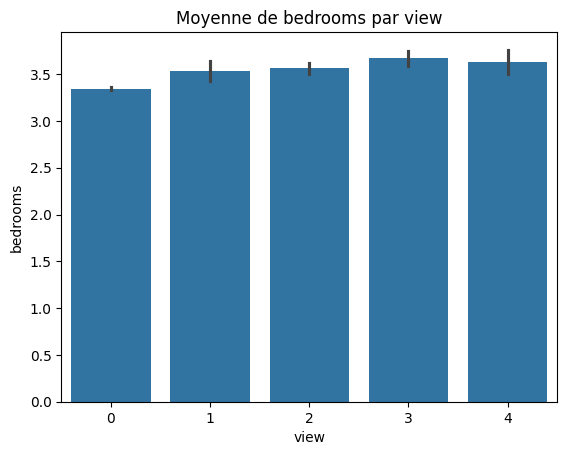

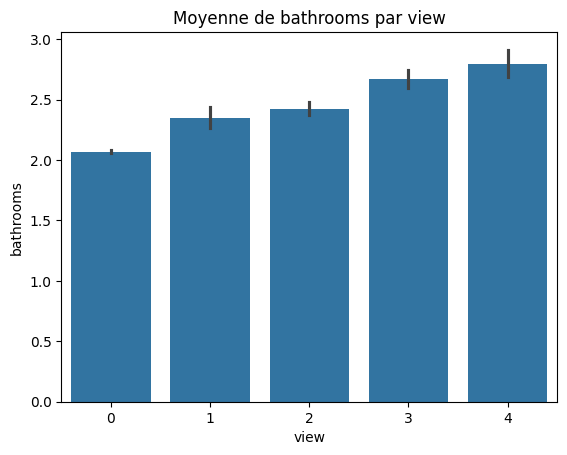

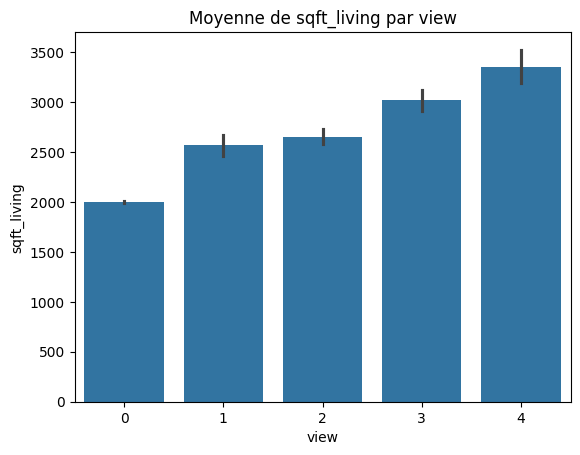

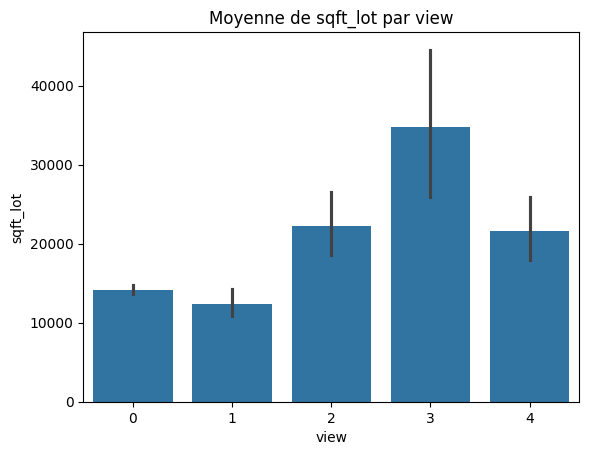

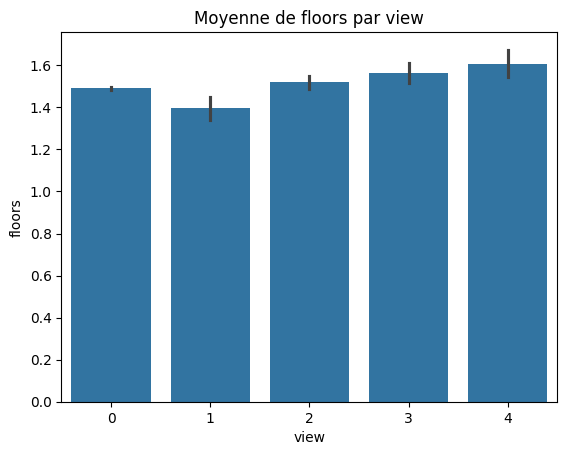

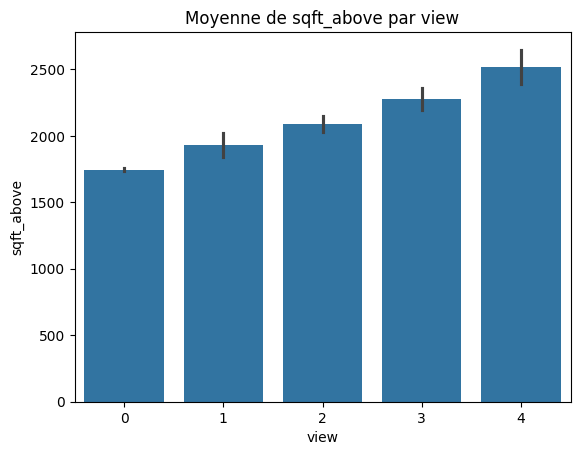

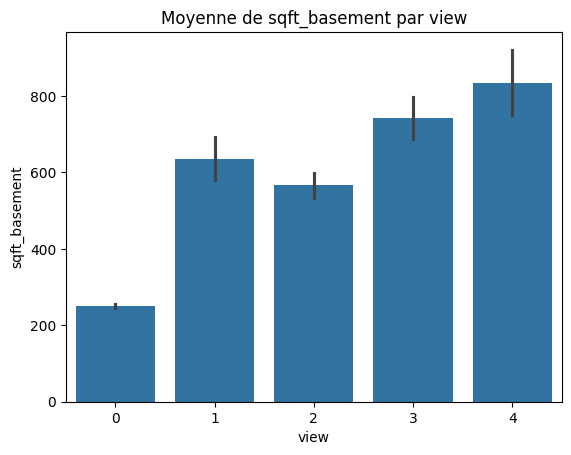

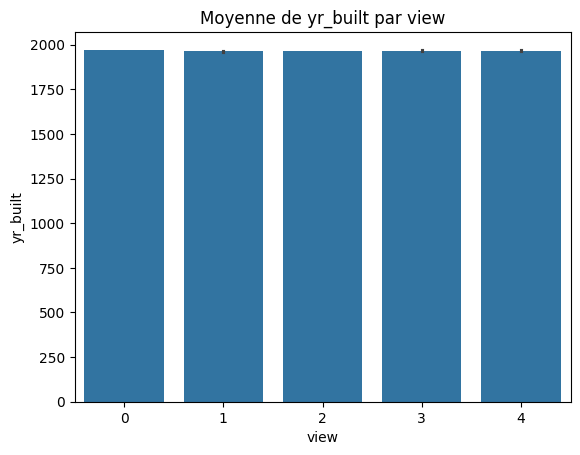

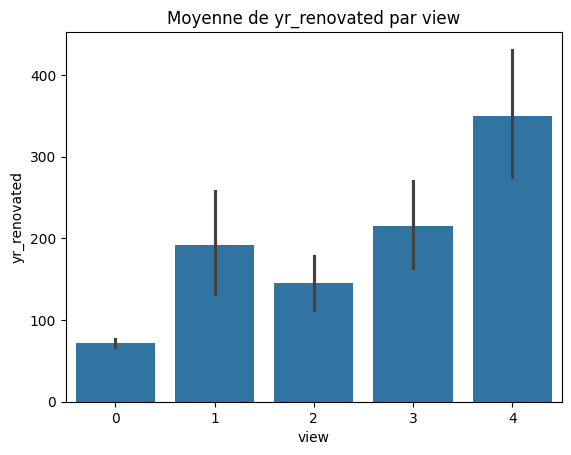

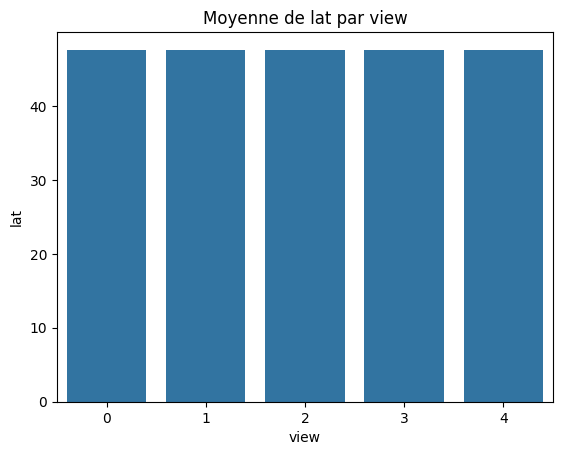

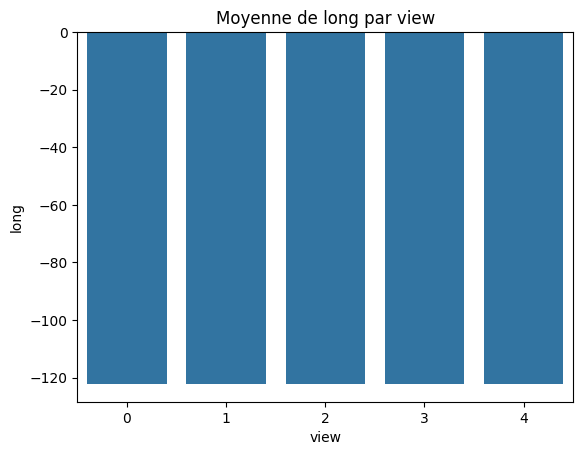

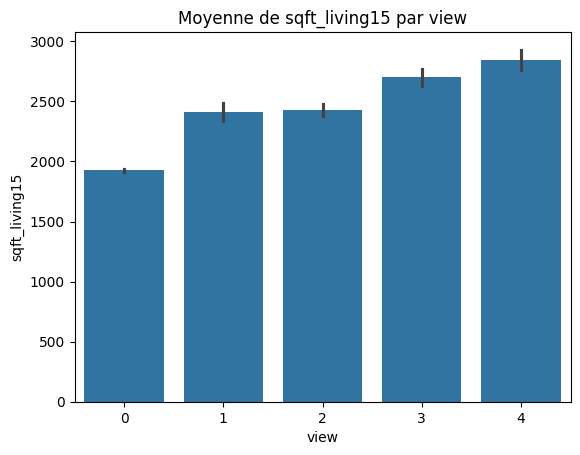

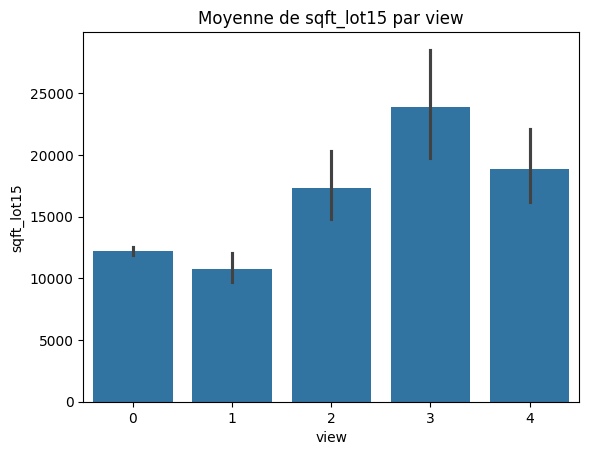

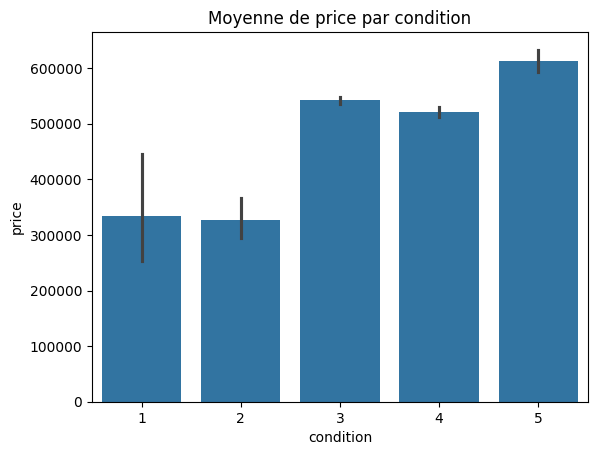

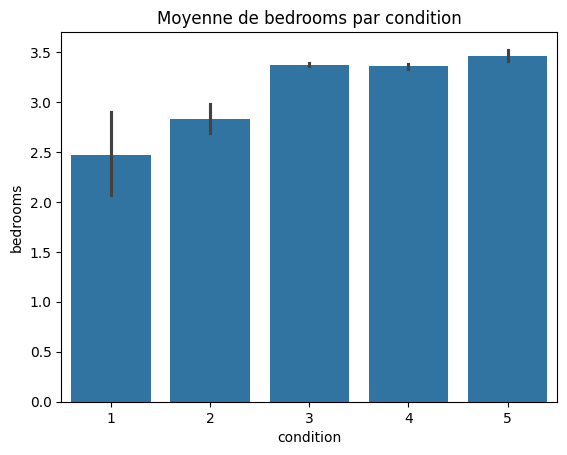

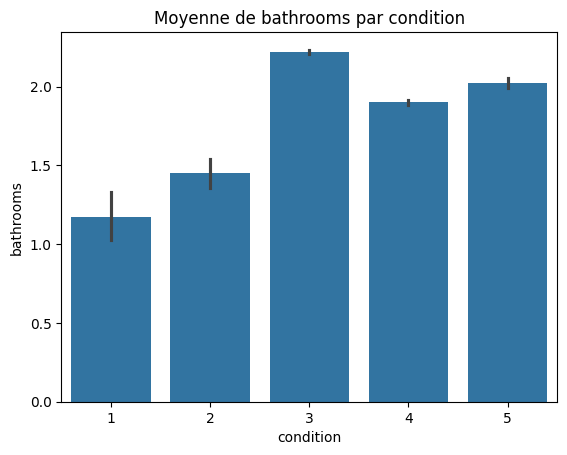

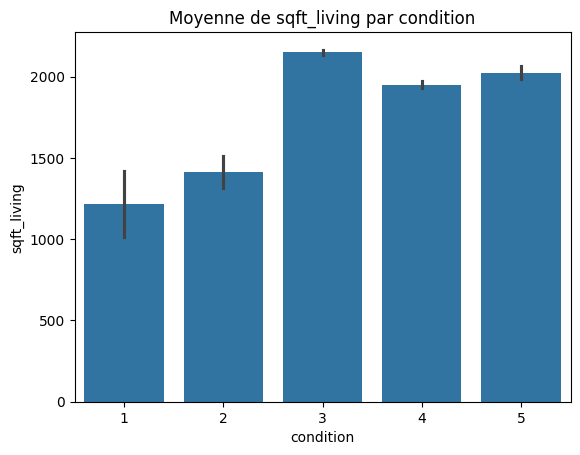

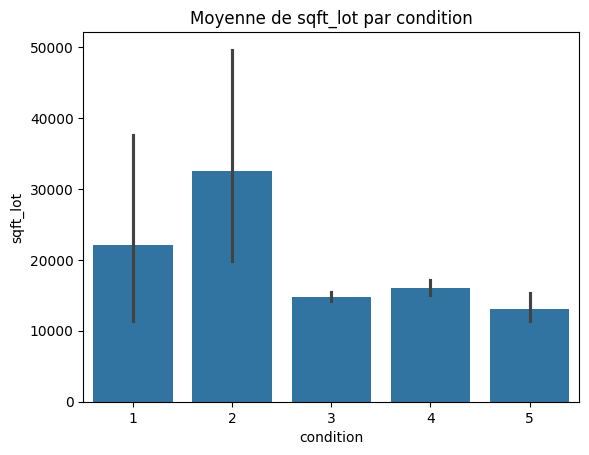

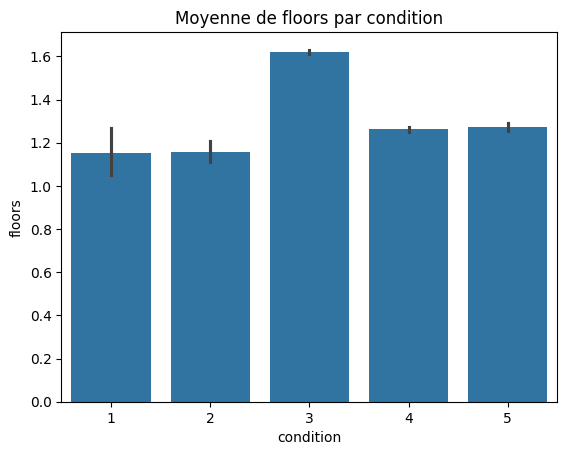

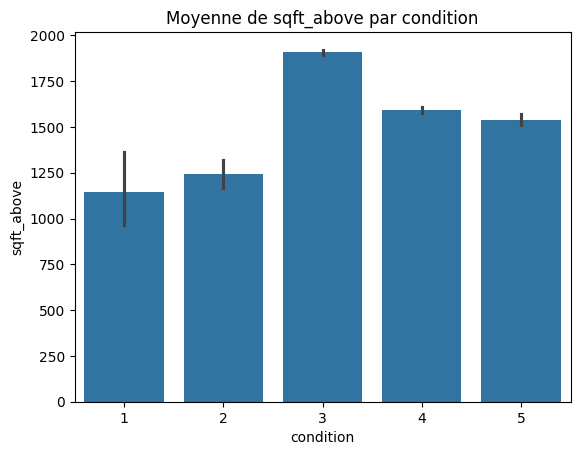

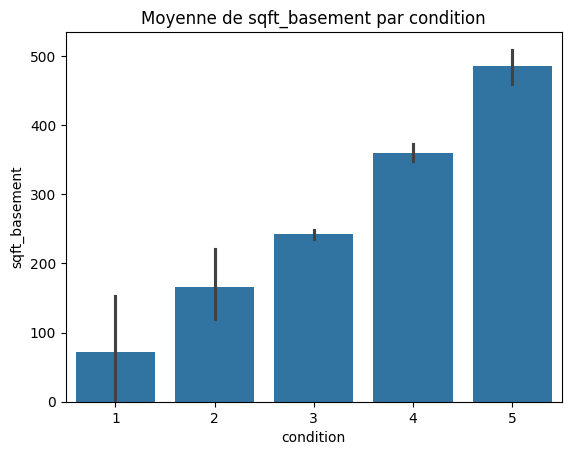

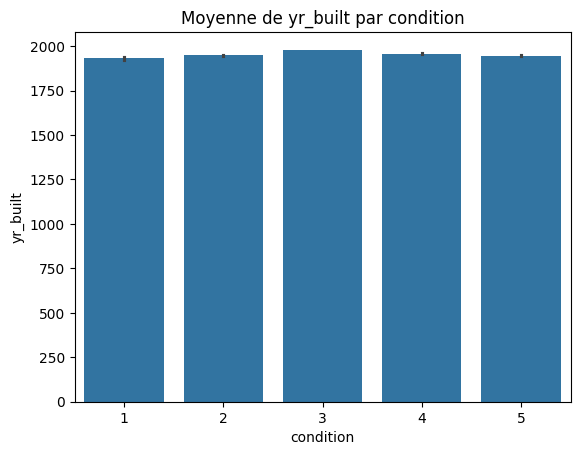

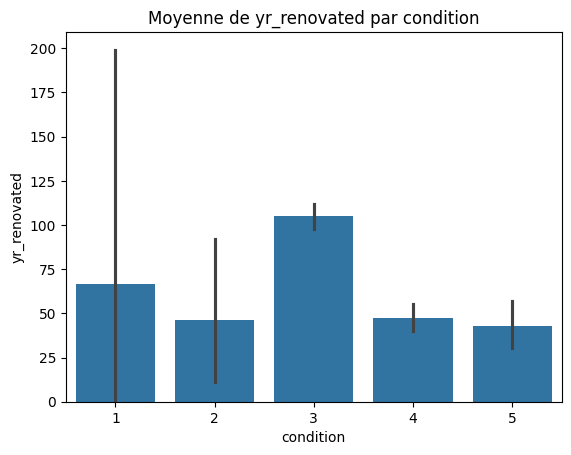

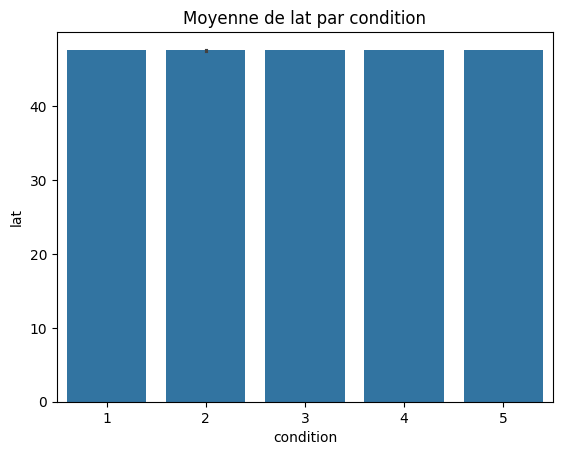

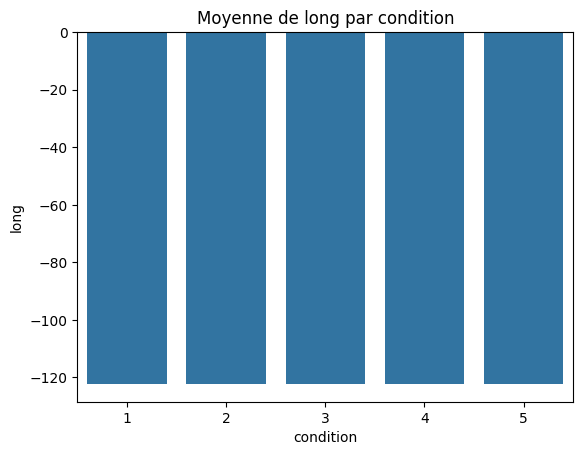

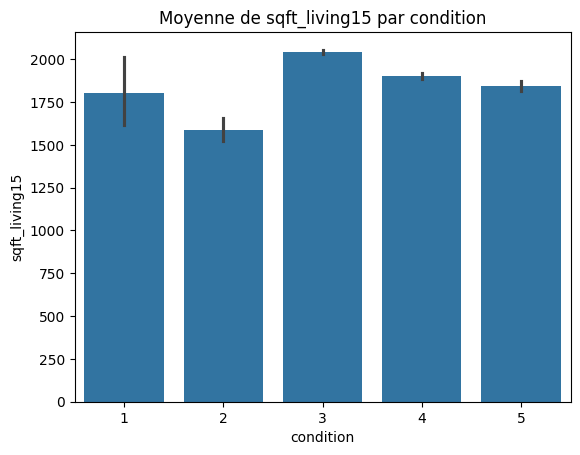

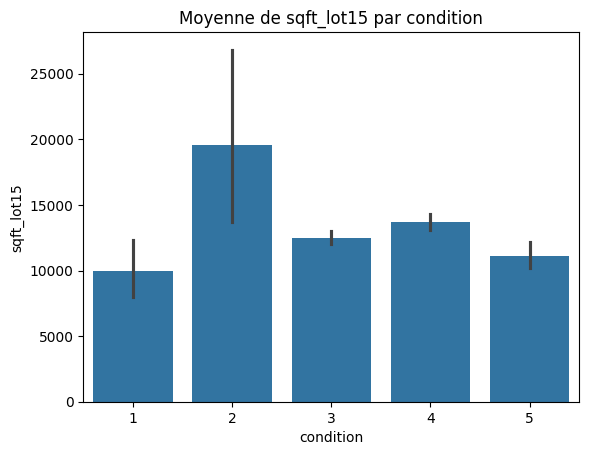

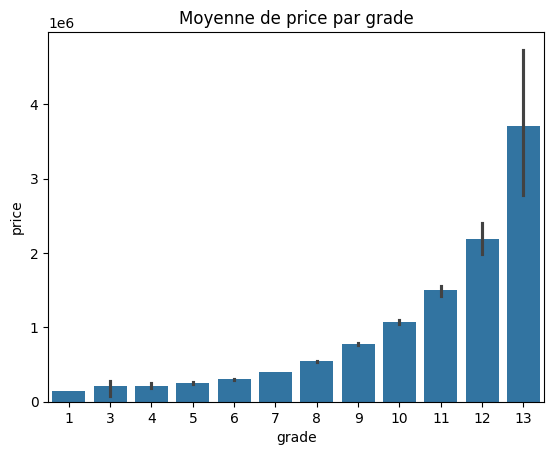

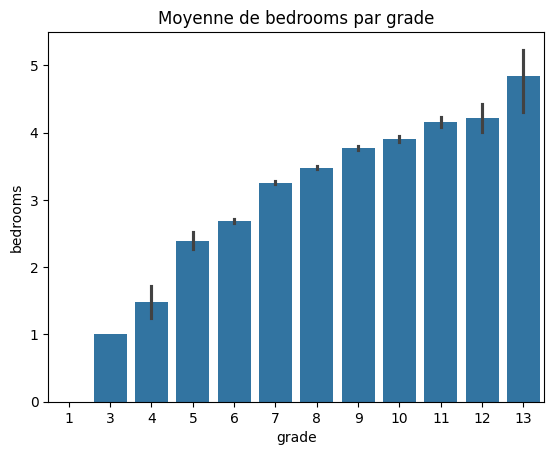

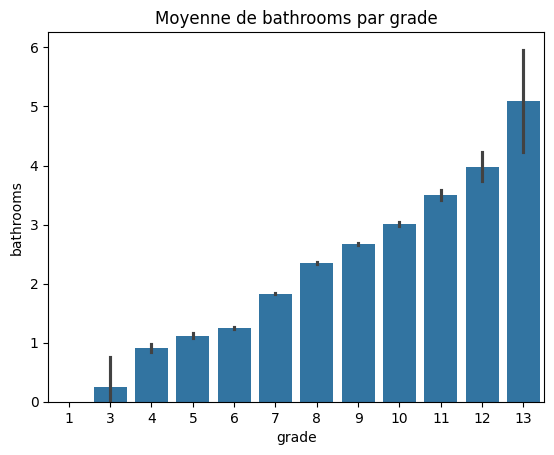

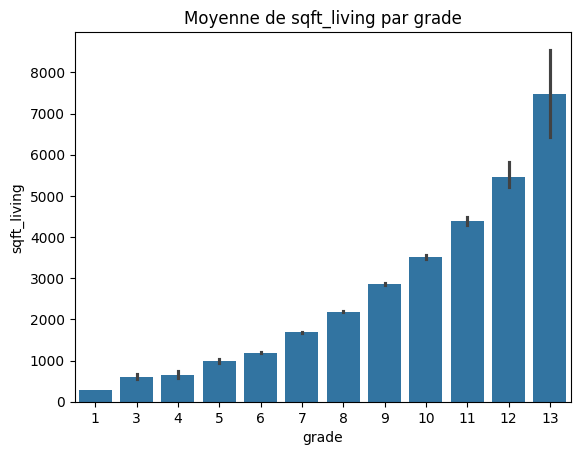

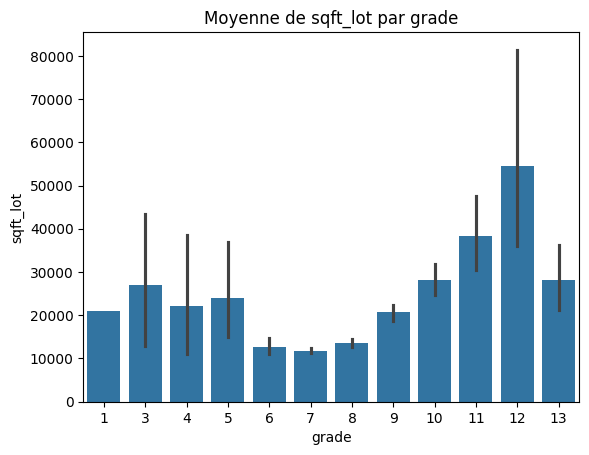

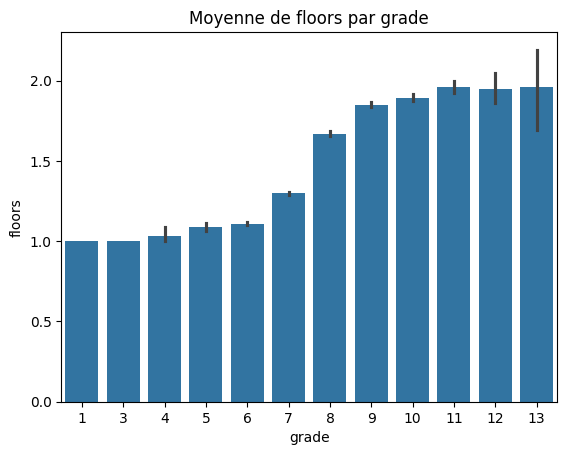

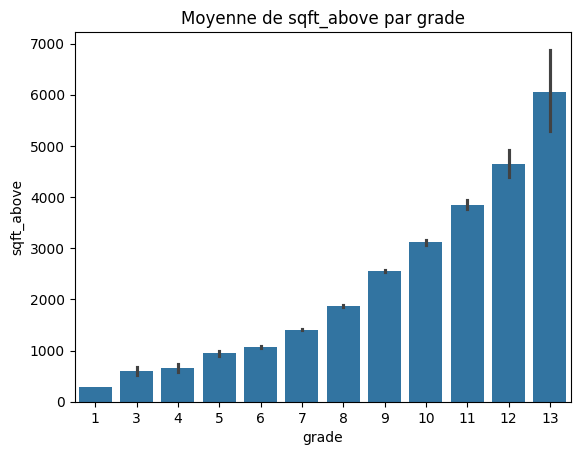

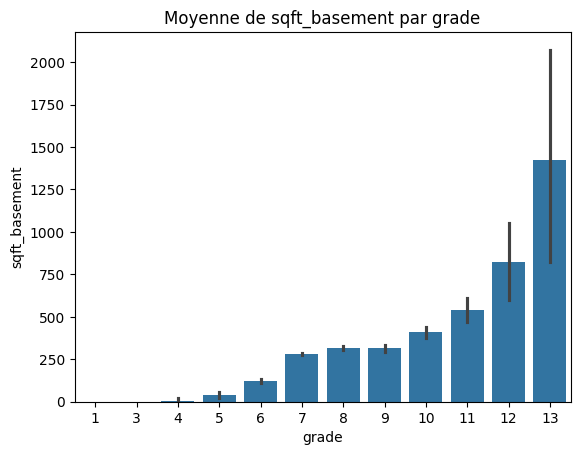

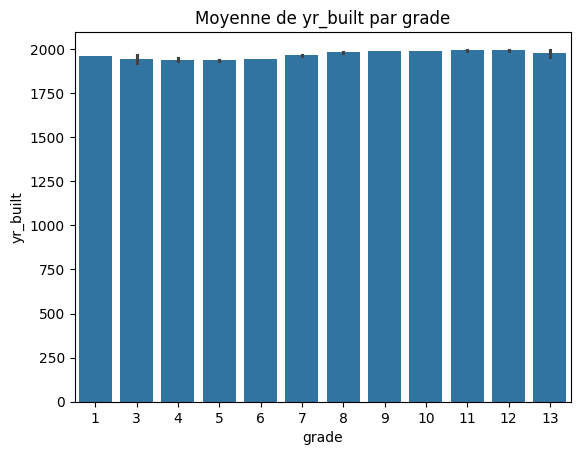

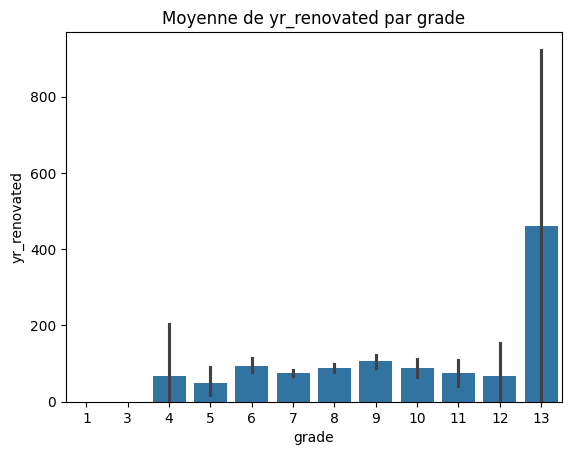

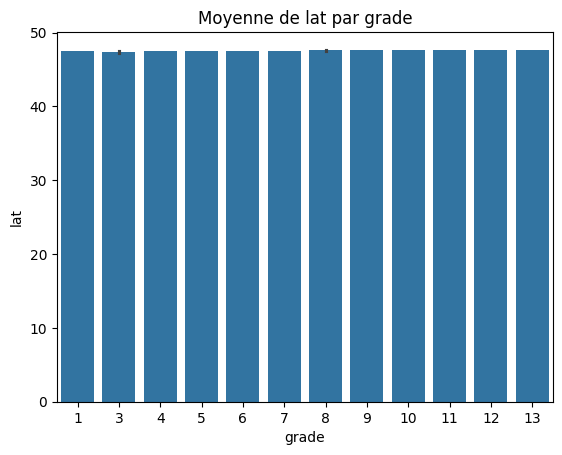

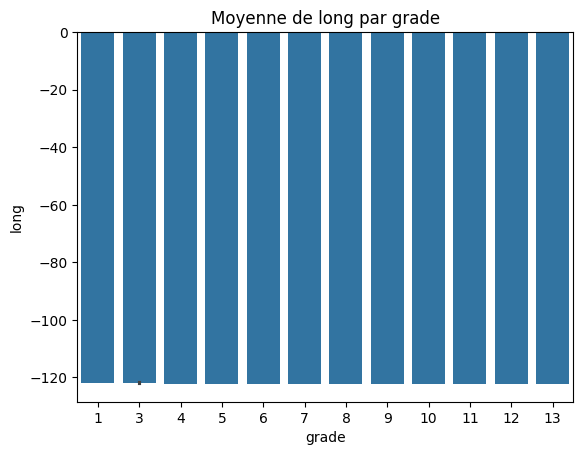

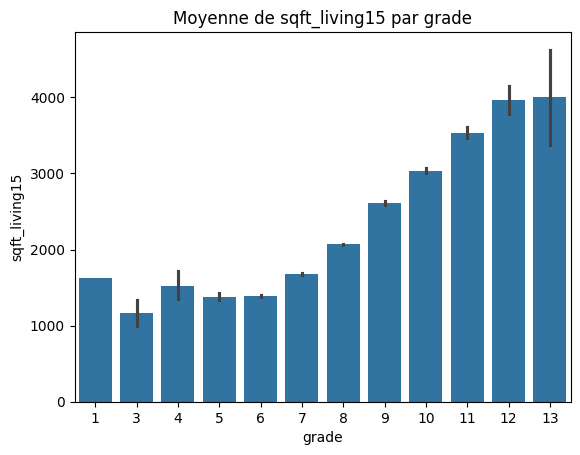

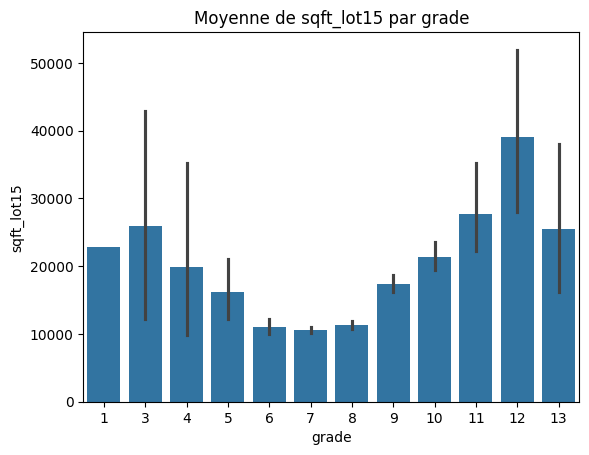

In [5]:
# 2. Relation entre variables numériques et catégoriques :

# Visualisation des moyennes par catégorie :

for col_cat in df.select_dtypes(include=['category']):
    for col_num in df.select_dtypes(include=['int64', 'float64']):
        sns.barplot(x=col_cat, y=col_num, data=df)
        plt.title(f"Moyenne de {col_num} par {col_cat}")
        plt.show()

In [13]:
# Scatterplots pour observer les tendances :

# Récupérer les colonnes selon leurs types
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.difference(['price'])
cat_cols = df.select_dtypes(include=['category']).columns

# Scatterplots pour les colonnes numériques uniquement
for var1 in num_cols:  # Colonnes numériques sans 'price'
    sns.scatterplot(x='price', y=var1, data=df)
    plt.title(f"Scatterplot de price et {var1}")
    plt.show()

# Parcourir toutes les combinaisons possibles de colonnes numériques et catégoriques
for var1 in num_cols:  # Colonnes numériques sans 'price'
    for var2 in cat_cols:  # Chaque colonne catégorielle
        # Scatterplot avec coloration par la variable catégorielle
        sns.scatterplot(x='price', y=var1, hue=var2, data=df)
        plt.title(f"Scatterplot de price et {var1} par {var2}")
        plt.show()



Output hidden; open in https://colab.research.google.com to view.

In [16]:
df['floors'].value_counts()

,count
floors,
1.0,10679
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Observations et questionnements


*   'bathrooms' : on a des biens avec 0 salles-de-bain. Est-ce une erreur ? On ne peut pas savoir. Dans un cas réel, on peut demander au client, au fournisseur des données. Dans le doute ici, on le conserve, le bien peut-être un bien atypique.
*   'bedrooms' : on a un outliers avec 33 chambres. Est-ce une erreur ? Il va falloir examiner la ligne plus en détails. cf. étape suivante.
*   'floors' : on a des étages à 0.5. Cela peut être dû à des niveaux intermédiaires ? Dans le doute on garde car représente un nombre conséquent de lignes.







# Étape 5 : Gestion des Anomalies

In [15]:
# 1. Traitement des valeurs manquantes :
# Vérifier les valeurs manquantes
# Supprimer ou imputer selon la situation :

# data['colonne'] = data['colonne'].fillna(data['colonne'].median())  # Exemple : Remplir avec la médiane

# 2. Traitement des outliers :
# 2.1. Suppression des valeurs aberrantes en lot :

# Q1 = data['colonne'].quantile(0.25)
# Q3 = data['colonne'].quantile(0.75)
# IQR = Q3 - Q1
# data = data[~((data['colonne'] < (Q1 - 1.5 * IQR)) | (data['colonne'] > (Q3 + 1.5 * IQR)))]

# 2.1. Suppression des valeurs aberrantes spécifiques :
display(df[df['bedrooms'] == 33])
df = df.drop(15870) # on supprime la ligne concernée
# df = df[~df['bedrooms'] == 33] # alternative qui conserve tout sauf la ligne concernée

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,NaT,640000.0,33,1.75,1620,6000,1.0,False,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


# Étape 6 : Régréssion linéaire multiple

In [36]:
# MODELE 0

# 1. Choix des colonnes X pour la regression linéaire multiple :
# Extraire dynamiquement les noms des colonnes de type int, float et category
# et exclure les colonnes gênantes

columns_X0 = df.select_dtypes(include=['int64', 'float64','category']).columns.difference(['price','id','date']).tolist()

# Sélection des variables indépendantes (sans les valeurs manquantes)
df0 = df[df['price'].notna()]

X0 = df0[columns_X0]
y0 = df0['price']

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, train_size = 0.75)

print("Colonnes utilisées pour X :", columns_X0)


# 2. Entrainer le modèle

model0 = LinearRegression().fit(X0_train, y0_train)

print(f"Score d'entrainement : {model0.score(X0_train, y0_train)}")
print(f"Score de test : {model0.score(X0_test, y0_test)}")


# 3. Faire des prédictions

df_predict0 = df[df['price'].isna()]
predict0 = model0.predict(df_predict0[columns_X0])
print(f"Prédictions : {predict0}")

Colonnes utilisées pour X : ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'lat', 'long', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 'yr_built', 'yr_renovated']
Score d'entrainement : 0.6821963372388642
Score de test : 0.6717213265241955
Prédictions : [468230.01215389 170367.12952363 364586.87569647 172835.64125823]


## Conclusion MODEL 0:
Le modèle est stable, robuste car les scores d'entrainement et de test sont très proches.

Pas de surapprentissage détecté.

Le modèle est modérémment performant.

In [41]:
# MODELE 1
# 1. Choix des colonnes selon valeur du coefficient de correlation

# Récupérer les corrélations avec la colonne 'price'
correlations_with_price1 = correlation_matrix['price']

# Filtrer les colonnes avec un coefficient de corrélation entre 0.5 et 1 ou entre -1 et -0.5
columns_with_correlation1 = correlations_with_price1[(correlations_with_price1 > -0.8) & (correlations_with_price1 < 0.8)].index.tolist()

# 2. Choix des colonnes X pour la regression linéaire multiple :

columns_X1 = df[columns_with_correlation1].columns

# Retirer la colonne 'price'
columns_X1 = [col for col in columns_X1 if col != 'price']

# Sélection des variables indépendantes (sans les valeurs manquantes)
df1 = df[df['price'].notna()]

X1 = df1[columns_X1].select_dtypes(include=['int64', 'float64'])
y1 = df1['price']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.75)

print("Colonnes utilisées pour X :", list(X1))


# 2. Entrainer le modèle

model1 = LinearRegression().fit(X1_train, y1_train)

print(f"Score d'entrainement : {model1.score(X1_train, y1_train)}")
print(f"Score de test : {model1.score(X1_test, y1_test)}")


# 3. Faire des prédictions

df_predict1 = df[df['price'].isna()]
predict1 = model1.predict(df_predict1[list(X1)])
print(f"Prédictions : {predict1}")

Colonnes utilisées pour X : ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Score d'entrainement : 0.6257638849483362
Score de test : 0.62191310577041
Prédictions : [490071.10528424 151277.0510433  300008.63079605 153561.48902038]


### Conclusion MODEL 1:
Le modèle est stable, robuste car les scores d'entrainement et de test sont très proches.

Pas de surapprentissage détecté.

Le modèle est moins performant que le modèle 0.